# Sales Dataframe

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Sales Analysis').getOrCreate()

In [5]:
spark

# Sales Dataframe

In [19]:
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, DateType

schema = StructType([

  StructField("product_id", IntegerType(), True),
  StructField("customer_id", StringType(), True),
  StructField("order_date", DateType(), True),
  StructField("location", StringType(), True),
  StructField("source_order", StringType(), True)

])
sales_df = spark.read.csv(r"C:\Users\Sarayu\Downloads\sales_analysis_data.csv" , schema = schema, header = True)

display(sales_df)


DataFrame[product_id: int, customer_id: string, order_date: date, location: string, source_order: string]

In [20]:
sales_df.show()

+----------+-----------+----------+--------+------------+
|product_id|customer_id|order_date|location|source_order|
+----------+-----------+----------+--------+------------+
|         2|          A|2022-01-01|   India|      Swiggy|
|         2|          A|2023-01-07|   India|      Swiggy|
|         3|          A|2023-01-10|   India|  Restaurant|
|         3|          A|2022-01-11|   India|      Swiggy|
|         3|          A|2023-01-11|   India|  Restaurant|
|         2|          B|2022-02-01|   India|      Swiggy|
|         2|          B|2023-01-02|   India|      Swiggy|
|         1|          B|2023-01-04|   India|  Restaurant|
|         1|          B|2023-02-11|   India|      Swiggy|
|         3|          B|2023-01-16|   India|      zomato|
|         3|          B|2022-02-01|   India|      zomato|
|         3|          C|2023-01-01|   India|      zomato|
|         1|          C|2023-01-01|      UK|      Swiggy|
|         6|          C|2022-01-07|      UK|      zomato|
|         3|  

In [22]:
from pyspark.sql.functions import year, month, quarter

sales_df = sales_df.withColumn("order_year", year("order_date"))
sales_df = sales_df.withColumn("order_month", month("order_date"))
sales_df = sales_df.withColumn("quarter", quarter("order_date"))
display(sales_df)

DataFrame[product_id: int, customer_id: string, order_date: date, location: string, source_order: string, order_year: int, order_month: int, quarter: int]

In [23]:
sales_df.show()

+----------+-----------+----------+--------+------------+----------+-----------+-------+
|product_id|customer_id|order_date|location|source_order|order_year|order_month|quarter|
+----------+-----------+----------+--------+------------+----------+-----------+-------+
|         2|          A|2022-01-01|   India|      Swiggy|      2022|          1|      1|
|         2|          A|2023-01-07|   India|      Swiggy|      2023|          1|      1|
|         3|          A|2023-01-10|   India|  Restaurant|      2023|          1|      1|
|         3|          A|2022-01-11|   India|      Swiggy|      2022|          1|      1|
|         3|          A|2023-01-11|   India|  Restaurant|      2023|          1|      1|
|         2|          B|2022-02-01|   India|      Swiggy|      2022|          2|      1|
|         2|          B|2023-01-02|   India|      Swiggy|      2023|          1|      1|
|         1|          B|2023-01-04|   India|  Restaurant|      2023|          1|      1|
|         1|         

In [28]:
schema1 = StructType([
    StructField("product_id", IntegerType(), True),
    StructField("product_name", StringType(), True),
    StructField("price",IntegerType(), True)
])

menu_df = spark.read.csv(r"C:\Users\Sarayu\Downloads\menu_data.csv", schema = schema1, header = True)
display(menu_df)

DataFrame[product_id: int, product_name: string, price: int]

In [29]:
menu_df.show()

+----------+------------+-----+
|product_id|product_name|price|
+----------+------------+-----+
|         2|     Chowmin|  150|
|         3|    sandwich|  120|
|         4|        Dosa|  110|
|         5|     Biryani|   80|
|         6|       Pasta|  180|
+----------+------------+-----+



In [32]:
from pyspark.sql.functions import sum, col

total_amount_spent = sales_df.join(menu_df, "product_id").groupby("customer_id").agg(sum("price").alias("total_spent")).orderBy("customer_id")

total_amount_spent.show()
     

+-----------+-----------+
|customer_id|total_spent|
+-----------+-----------+
|          A|       3960|
|          B|       3240|
|          C|       1800|
|          D|       1200|
|          E|       2040|
+-----------+-----------+



In [34]:
total_amount_spent = sales_df.join(menu_df, "product_id").groupBy("product_name").agg(sum("price").alias("total_spent_on_food")).orderBy("total_spent_on_food")
total_amount_spent.show()

+------------+-------------------+
|product_name|total_spent_on_food|
+------------+-------------------+
|     Biryani|                480|
|       Pasta|               1080|
|        Dosa|               1320|
|     Chowmin|               3600|
|    sandwich|               5760|
+------------+-------------------+



In [36]:
total_sales_each_month = sales_df.join(menu_df, "product_id").groupBy("order_month").agg(sum("price").alias("sales_each_month")).orderBy("order_month")
total_sales_each_month.show()

+-----------+----------------+
|order_month|sales_each_month|
+-----------+----------------+
|          1|            2460|
|          2|            2430|
|          3|             810|
|          5|            2460|
|          6|            2460|
|          7|             810|
|         11|             810|
+-----------+----------------+



In [37]:
yearly_sales_df = sales_df.join(menu_df, "product_id").groupBy("order_year").agg(sum("price").alias("yearly_sales")).orderBy("yearly_sales")
yearly_sales_df.show()

+----------+------------+
|order_year|yearly_sales|
+----------+------------+
|      2022|        4350|
|      2023|        7890|
+----------+------------+



In [38]:
quarter_df = sales_df.join(menu_df, "product_id").groupBy("quarter").agg(sum("price").alias("quarterly_sales")).orderBy("quarter")
quarter_df.show()
     

+-------+---------------+
|quarter|quarterly_sales|
+-------+---------------+
|      1|           5700|
|      2|           4920|
|      3|            810|
|      4|            810|
+-------+---------------+



In [39]:
from pyspark.sql.functions import count
count_purchase = sales_df.join(menu_df, "product_id").groupBy("product_name").agg(count("product_id").alias("how_many_time_purchased")).orderBy("how_many_time_purchased", ascending = False)
count_purchase.show()

+------------+-----------------------+
|product_name|how_many_time_purchased|
+------------+-----------------------+
|    sandwich|                     48|
|     Chowmin|                     24|
|        Dosa|                     12|
|     Biryani|                      6|
|       Pasta|                      6|
+------------+-----------------------+



In [40]:
from pyspark.sql.functions import count
count_purchase = sales_df.join(menu_df, "product_id").groupBy("product_name").agg(count("product_id").alias("how_many_time_purchased")).orderBy("how_many_time_purchased", ascending = False).limit(1)
count_purchase.show()

+------------+-----------------------+
|product_name|how_many_time_purchased|
+------------+-----------------------+
|    sandwich|                     48|
+------------+-----------------------+



In [41]:
from pyspark.sql.functions import countDistinct
restaurant_frequency = sales_df.filter(sales_df.source_order == "Restaurant").groupBy("customer_id").agg(countDistinct("order_date").alias("frequency"))
restaurant_frequency.show()

+-----------+---------+
|customer_id|frequency|
+-----------+---------+
|          E|        5|
|          B|        6|
|          D|        1|
|          C|        3|
|          A|        6|
+-----------+---------+



In [42]:
total_sales_country = sales_df.join(menu_df, "product_id").groupBy("location").agg(sum("price").alias("sales_by_country")).orderBy(col("sales_by_country").desc())
total_sales_country.show()

+--------+----------------+
|location|sales_by_country|
+--------+----------------+
|      UK|            6120|
|   India|            3960|
|     USA|            2160|
+--------+----------------+



In [43]:
df = sales_df.join(menu_df, "product_id").groupBy("product_name").agg(sum("price").alias("source_sum")).orderBy("source_sum", ascending = False)
df.show()

+------------+----------+
|product_name|source_sum|
+------------+----------+
|    sandwich|      5760|
|     Chowmin|      3600|
|        Dosa|      1320|
|       Pasta|      1080|
|     Biryani|       480|
+------------+----------+



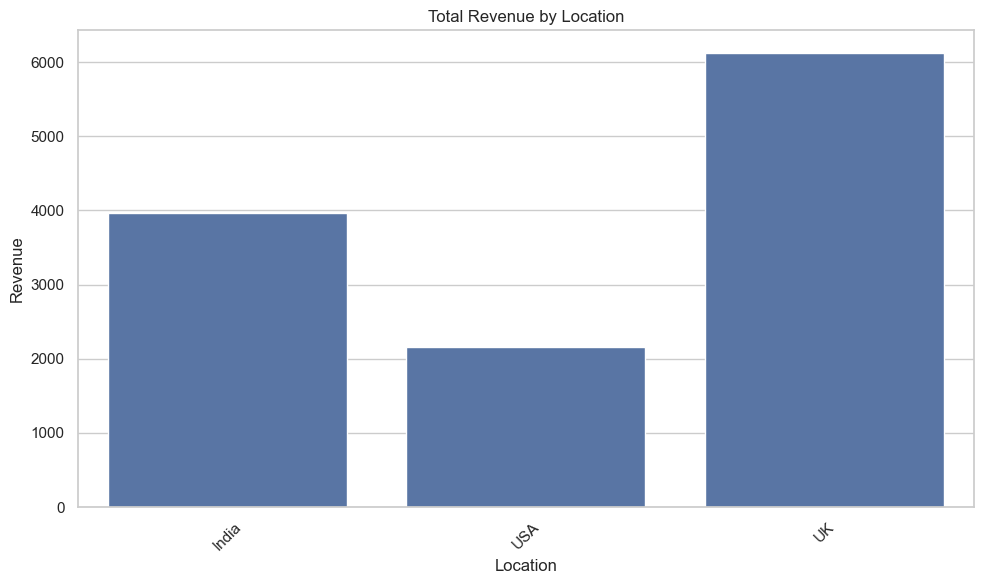

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import sum

# Set seaborn style and matplotlib inline for Jupyter
%matplotlib inline
sns.set(style="whitegrid")

# Example KPI: Total Revenue by Location
df_revenue = sales_df.join(menu_df, "product_id") \
                     .groupBy("location") \
                     .agg(sum("price").alias("total_revenue")) \
                     .toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x="location", y="total_revenue", data=df_revenue)
plt.title("Total Revenue by Location")
plt.xlabel("Location")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [48]:
# Set style for plots
sns.set(style="whitegrid")

# Total Amount Spent by Product

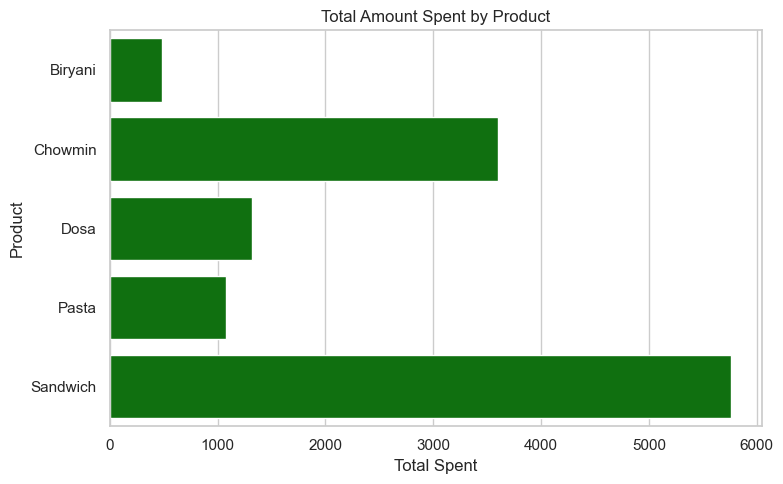

In [52]:
# 1. Total Amount Spent by Product
product_data = {
    "product_name": ["Biryani", "Chowmin", "Dosa", "Pasta", "Sandwich"],
    "total_spent_on_food": [480, 3600, 1320, 1080, 5760]
}
df_product = pd.DataFrame(product_data)

plt.figure(figsize=(8, 5))
sns.barplot(data=df_product, y="product_name", x="total_spent_on_food", color='green')
plt.title("Total Amount Spent by Product")
plt.xlabel("Total Spent")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

# Yearly Sales

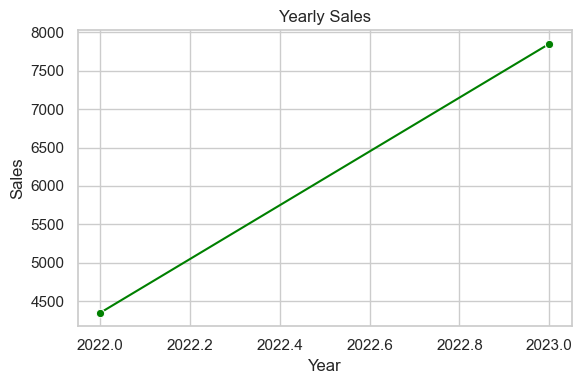

In [53]:
sns.set(style="whitegrid")

yearly_data = {
    "order_year": [2022, 2023],
    "yearly_sales": [4350, 7850]
}
df_yearly = pd.DataFrame(yearly_data)

plt.figure(figsize=(6, 4))
sns.lineplot(data=df_yearly, x="order_year", y="yearly_sales", marker='o', color='green')
plt.title("Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# Monthly Sales

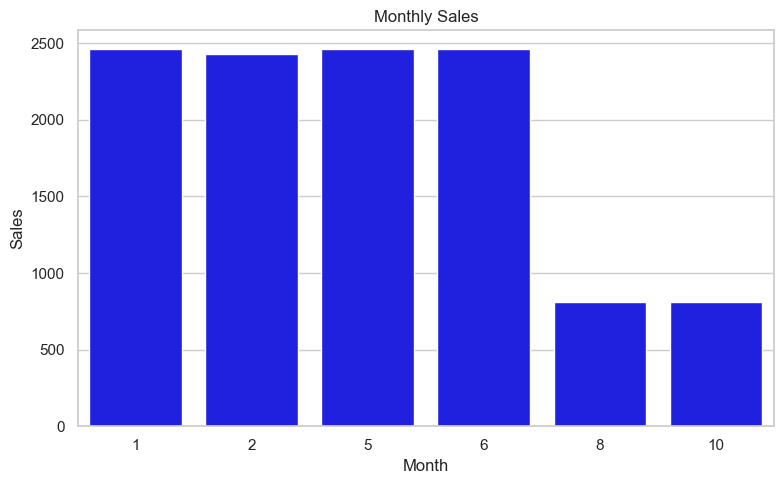

In [54]:
monthly_data = {
    "order_month": [1, 2, 5, 6, 8, 10],
    "sales_each_month": [2460, 2430, 2460, 2460, 810, 810]
}
df_monthly = pd.DataFrame(monthly_data)

plt.figure(figsize=(8, 5))
sns.barplot(data=df_monthly, x="order_month", y="sales_each_month", color='blue')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# Quarterly Sales

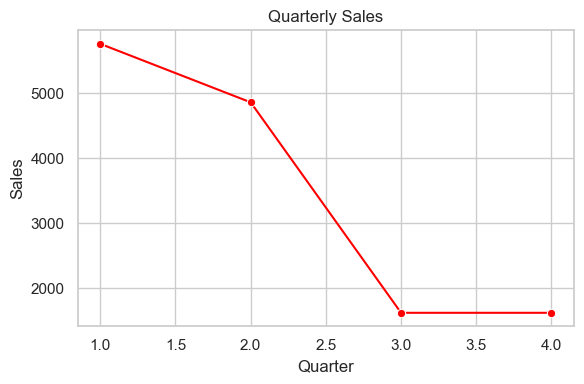

In [55]:
quarterly_data = {
    "quarter": [1, 2, 3, 4],
    "quarterly_sales": [5760, 4860, 1620, 1620]
}
df_quarterly = pd.DataFrame(quarterly_data)

plt.figure(figsize=(6, 4))
sns.lineplot(data=df_quarterly, x="quarter", y="quarterly_sales", marker='o', color='red')
plt.title("Quarterly Sales")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()